# 애플 스토어 데이터 분석 및 시각화

- Kaggle에 있는 Apple AppStore 데이터를 이용하여 변수별 다운로드 수를 종족변수로하여 변수 별로 비교, 분석한다.

### 데이터 분석, 시각화, 처리를 위해 필요한 모듈 불러오기

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### 데이터 불러오기

In [2]:
applestore_data = pd.read_csv('AppleStore.csv')
applestore_data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


##### 데이터 정보 확인

In [5]:
applestore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


##### 결측치 확인

In [6]:
applestore_data.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

##### 데이터 분석

In [10]:
print(applestore_data.describe())

         Unnamed: 0            id    size_bytes        price  \
count   7197.000000  7.197000e+03  7.197000e+03  7197.000000   
mean    4759.069612  8.631310e+08  1.991345e+08     1.726218   
std     3093.625213  2.712368e+08  3.592069e+08     5.833006   
min        1.000000  2.816565e+08  5.898240e+05     0.000000   
25%     2090.000000  6.000937e+08  4.692275e+07     0.000000   
50%     4380.000000  9.781482e+08  9.715302e+07     0.000000   
75%     7223.000000  1.082310e+09  1.819249e+08     1.990000   
max    11097.000000  1.188376e+09  4.025970e+09   299.990000   

       rating_count_tot  rating_count_ver  user_rating  user_rating_ver  \
count      7.197000e+03       7197.000000  7197.000000      7197.000000   
mean       1.289291e+04        460.373906     3.526956         3.253578   
std        7.573941e+04       3920.455183     1.517948         1.809363   
min        0.000000e+00          0.000000     0.000000         0.000000   
25%        2.800000e+01          1.000000     3.

##### user_rating의 density estimates

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


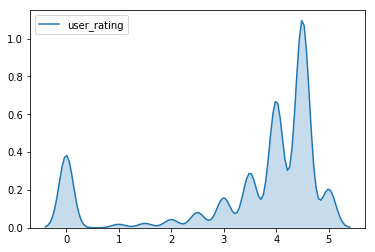

In [11]:
sns.kdeplot(shade=True,data=applestore_data['user_rating'])

### 가격별 다운로드 수

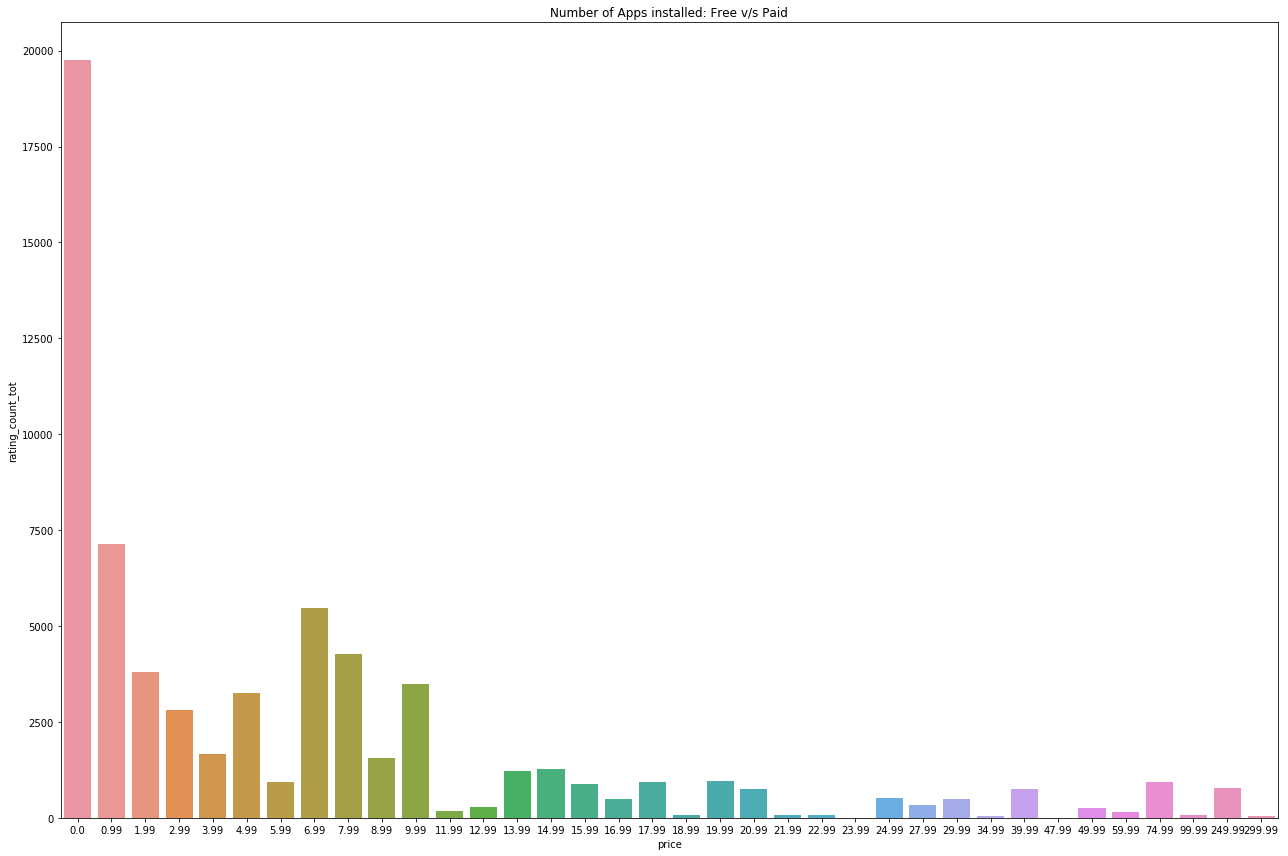

In [12]:
plt.figure(figsize=(18,12))
sns.barplot(x='price',y='rating_count_tot',data=applestore_data, ci=None)
plt.title("Number of Apps installed: Free v/s Paid")
plt.tight_layout()

### 카테고리별 다운로드 수

Text(0.5, 1.0, 'Number of Apps installed based on Category')

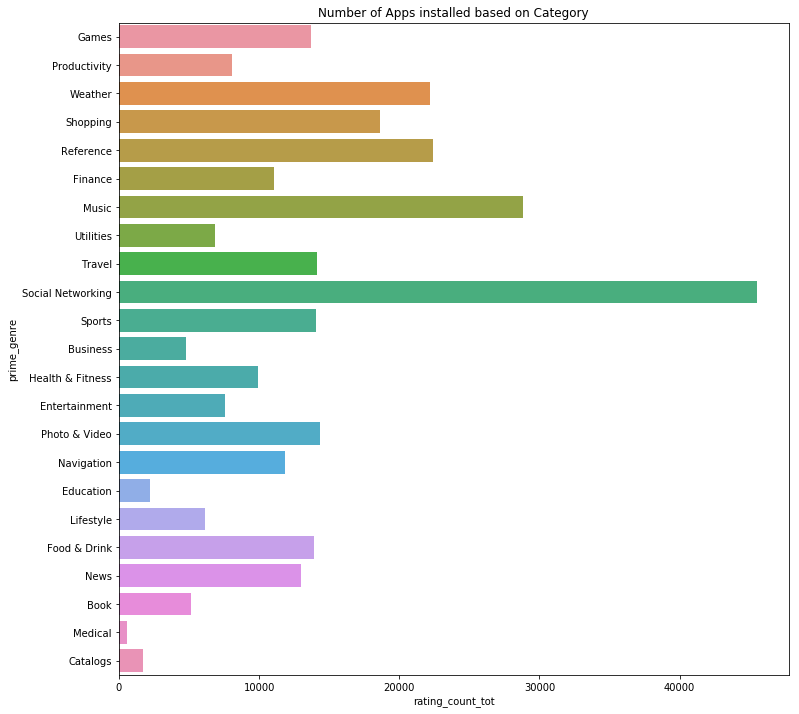

In [24]:
plt.figure(figsize=(12,12))
sns.barplot(x='rating_count_tot',y='prime_genre',data=applestore_data,ci=None)
plt.title("Number of Apps installed based on Category")

###  콘텐츠 등급 별 다운로드 수

Text(0.5, 1.0, 'Number of Apps installed based on Content rating')

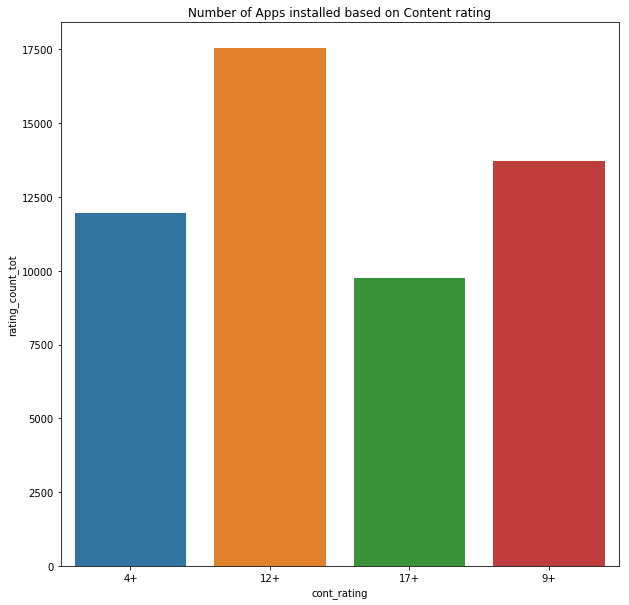

In [13]:
plt.figure(figsize=(10,10))
sns.barplot(x='cont_rating',y='rating_count_tot',data=applestore_data,ci=None)
plt.title("Number of Apps installed based on Content rating")

### 평점 별 다운로드 수

Text(0.5, 1.0, 'Number of Apps and ratings ')

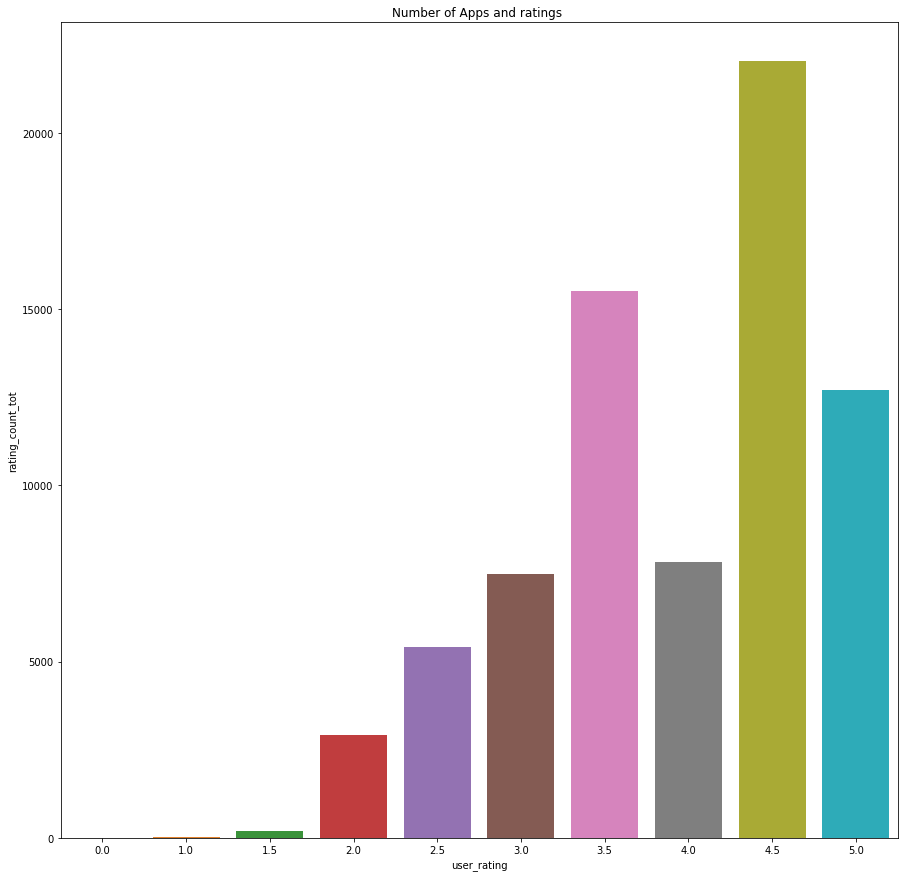

In [35]:
plt.figure(figsize=(15,15))
sns.barplot(y='rating_count_tot',x='user_rating',data=applestore_data,ci=None)
plt.title("Number of Apps and ratings ")